# Apresentação

Detecção de trafego malicioso em uma rede

Purpose: Data Preparation & Exploratory Data Analysis

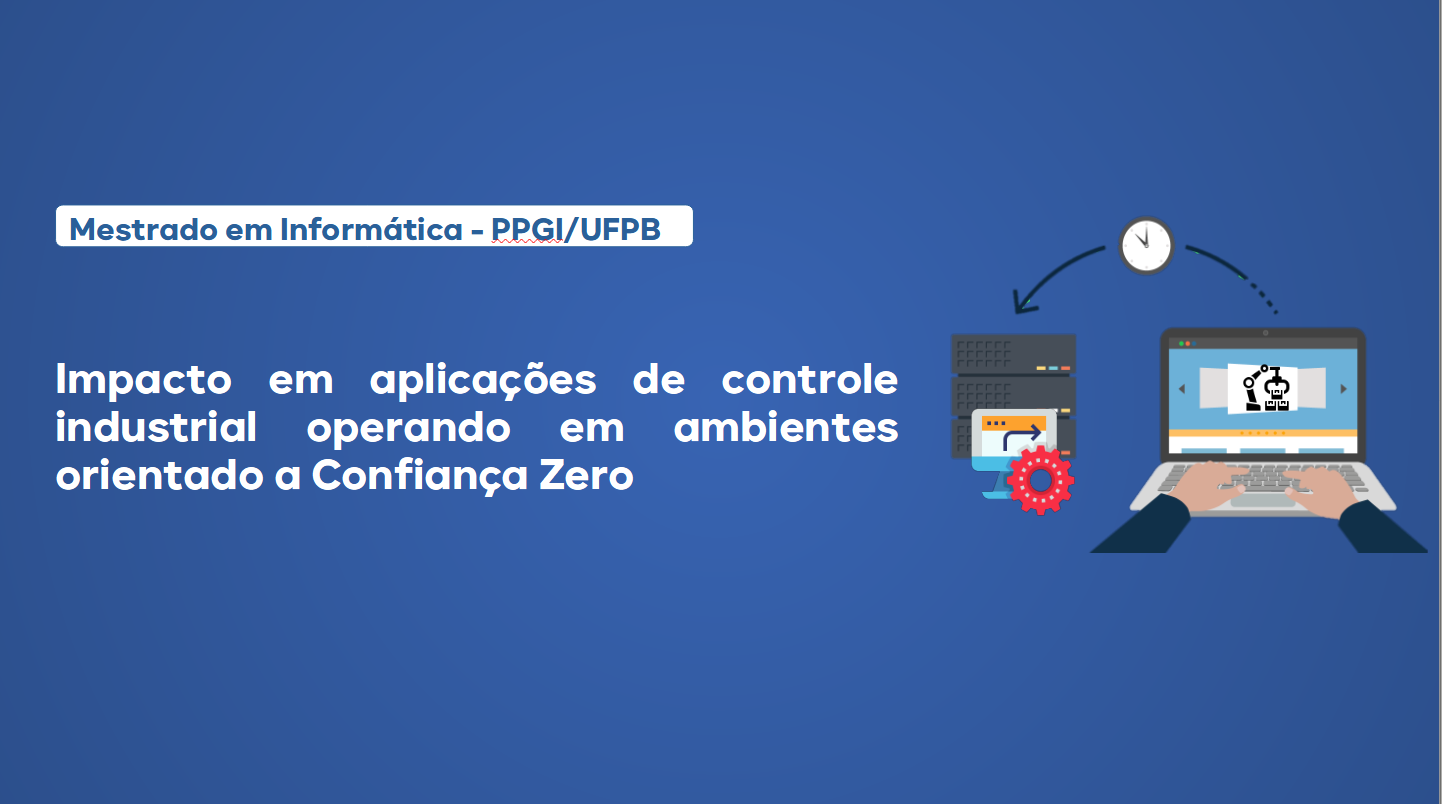

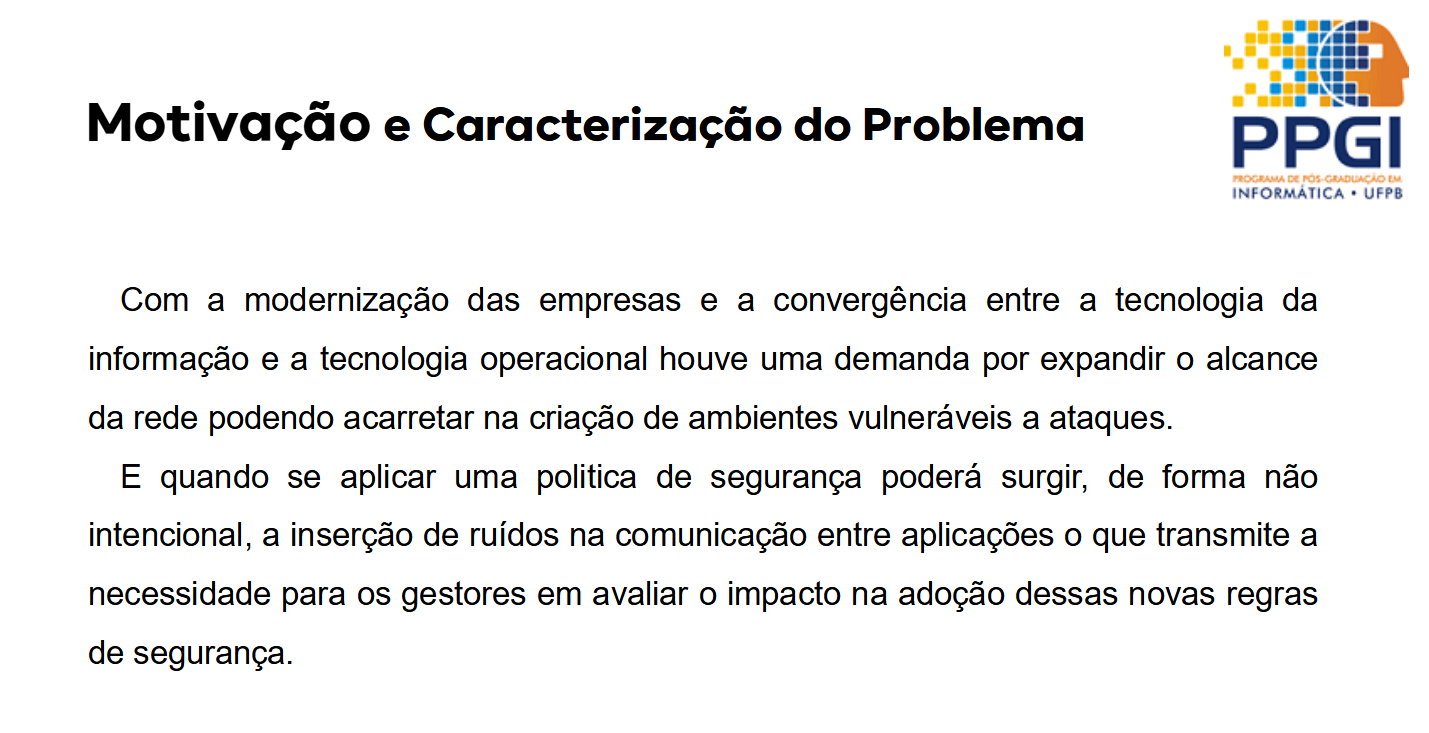

## O QUE ZERO TRUST

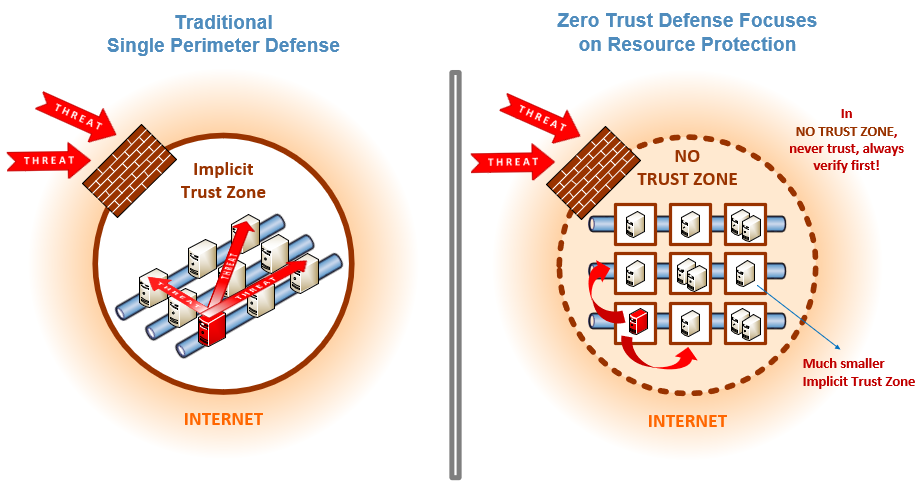



Confiança Zero fornece uma coleção de conceitos e ideias projetadas para mitigar incertezas quando se necessita aplicar decisões de acesso por solicitação de privilégio mínimo perante uma rede considerada insegura

Arquitetura de confiança zero segue como um plano de segurança que utiliza o conceito anterior para identificar o relacionamento de componentes, planejamento de fluxo de trabalho e acesso a políticas. 

#Zero Trust e Analise trafego.

Avaliação de estudo acerca de classificação se a transação ocorreu usando TOR ou não.

Com uso de modelo de regressão logística que estima a probabilidade de ocorrência de um evento, como voto ou não voto, com base em um determinado conjunto de dados de variáveis ​​independentes

### Proposta para futuros trabalhos e a abordagem no estudo para avaliação de falsos positivos de trafego legitimo estando em ambiente de confiança zero.

# Data Source
DarkNet 2020 dataset from the Canadian Institute for Cybersecurity at the University of New Brunswick

## Importando Biblioteca


In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import yellowbrick

pd.set_option('display.max_rows', 100)

# Preparação dos Dados

## Carregamento da Base

In [ ]:
# Load data into dataframe
data_file = "Data\Darknet.CSV"
df = pd.read_csv('http://205.174.165.80/CICDataset/CICDarknet2020/Dataset/Darknet.CSV')

In [ ]:
# Review Data Records
print(df.head())
print(df.dtypes)

                                      Flow ID         Src IP  Src Port  \
0     10.152.152.11-216.58.220.99-57158-443-6  10.152.152.11     57158   
1     10.152.152.11-216.58.220.99-57159-443-6  10.152.152.11     57159   
2     10.152.152.11-216.58.220.99-57160-443-6  10.152.152.11     57160   
3    10.152.152.11-74.125.136.120-49134-443-6  10.152.152.11     49134   
4  10.152.152.11-173.194.65.127-34697-19305-6  10.152.152.11     34697   

           Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0   216.58.220.99       443         6  24/07/2015 04:09:48 PM            229   
1   216.58.220.99       443         6  24/07/2015 04:09:48 PM            407   
2   216.58.220.99       443         6  24/07/2015 04:09:48 PM            431   
3  74.125.136.120       443         6  24/07/2015 04:09:48 PM            359   
4  173.194.65.127     19305         6  24/07/2015 04:09:45 PM       10778451   

   Total Fwd Packet  Total Bwd packets  ...  Active Mean  Active Std  \
0 

Dataset inicialmente com 85 colunas

## Colunas derivadas


In [ ]:
# Split ip address fields
def ip_class_a(x):
    ip_list = x.split(".")
    class_a = ip_list[0]
    return class_a

def ip_class_b(x):
    ip_list = x.split(".")
    class_b = ip_list[1]
    return class_b

def ip_class_c(x):
    ip_list = x.split(".")
    class_c = ip_list[2]
    return class_c

def ip_host(x):
    ip_list = x.split(".")
    host = ip_list[3]
    return host

df['src_ip_class_a']=df['Src IP'].apply(ip_class_a)
df['src_ip_class_b']=df['Src IP'].apply(ip_class_b)
df['src_ip_class_c']=df['Src IP'].apply(ip_class_c)
df['src_ip_host']=df['Src IP'].apply(ip_host)

df['dst_ip_class_a']=df['Dst IP'].apply(ip_class_a)
df['dst_ip_class_b']=df['Dst IP'].apply(ip_class_b)
df['dst_ip_class_c']=df['Dst IP'].apply(ip_class_c)
df['dst_ip_host']=df['Dst IP'].apply(ip_host)

# Convert derived columns to integer from string
df['src_ip_class_a'] = df.src_ip_class_a.astype(int)
df['src_ip_class_b'] = df.src_ip_class_b.astype(int)
df['src_ip_class_c'] = df.src_ip_class_c.astype(int)
df['src_ip_host'] = df.src_ip_host.astype(int)

df['dst_ip_class_a'] = df.dst_ip_class_a.astype(int)
df['dst_ip_class_b'] = df.dst_ip_class_b.astype(int)
df['dst_ip_class_c'] = df.dst_ip_class_c.astype(int)
df['dst_ip_host'] = df.dst_ip_host.astype(int)

#df.tail(5)

## Limpeza dos Dados

In [ ]:
# Filter dataset to select Tor and Non-Tor records only
tor_df = df[(df.Label == 'Tor') | (df.Label == 'Non-Tor')]

In [ ]:
# Rename column names with slashes
tor_df.rename(columns = {'Flow Bytes/s':'Flow Bytes'}, inplace = True)
tor_df.rename(columns = {'Flow Packets/s':'Flow Packets'}, inplace = True)
tor_df.rename(columns = {'Fwd Packets/s':'Fwd Packets'}, inplace = True)
tor_df.rename(columns = {'Bwd Packets/s':'Bwd Packets'}, inplace = True)

# Fix case in traffic category
tor_df['Label.1'].replace({'AUDIO-STREAMING': 'Audio-Streaming'}, inplace=True)
tor_df['Label.1'].replace({'File-transfer': 'File-Transfer'}, inplace=True)

tor_df.tail(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Label,Label.1,src_ip_class_a,src_ip_class_b,src_ip_class_c,src_ip_host,dst_ip_class_a,dst_ip_class_b,dst_ip_class_c,dst_ip_host
118606,131.202.240.150-131.202.244.5-38248-53-17,131.202.240.150,38248,131.202.244.5,53,17,2/4/2015 11:28,89326,1,1,...,Tor,Video-Streaming,131,202,240,150,131,202,244,5
118607,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2/4/2015 11:29,16,2,0,...,Tor,Video-Streaming,8,6,0,1,8,0,6,4
118608,131.202.240.150-216.58.219.195-53347-80-6,131.202.240.150,53347,216.58.219.195,80,6,2/4/2015 11:28,90113836,3,3,...,Tor,Video-Streaming,131,202,240,150,216,58,219,195
118609,131.202.240.150-173.194.123.100-40594-443-6,131.202.240.150,40594,173.194.123.100,443,6,2/4/2015 11:28,90141353,3,3,...,Tor,Video-Streaming,131,202,240,150,173,194,123,100
118610,131.202.240.150-173.194.123.48-47131-80-6,131.202.240.150,47131,173.194.123.48,80,6,2/4/2015 11:28,90137239,3,3,...,Tor,Video-Streaming,131,202,240,150,173,194,123,48


### Lidando com valores ausentes


In [ ]:
# Find features with missing values
print('Missing Values:')
print(tor_df.isnull().sum())

# Replace missing values with 0
tor_df['Flow Bytes'].fillna(0, inplace = True)
#print(tor_df.isnull().sum())

# Impute values labeled as 'Infinity' with a number 100 times greater than the max value of the column
# Flow Packets
print(np.isinf(tor_df['Flow Packets']).values.sum())
tor_df['Flow Packets'] = tor_df['Flow Packets'].replace(np.inf,20000000)
#print(np.isinf(tor_df['Flow Packets']).values.sum())

# Flow Bytes
print(np.isinf(tor_df['Flow Bytes']).values.sum())
tor_df['Flow Bytes'] = tor_df['Flow Bytes'].replace(np.inf,34600000000)
#print(np.isinf(tor_df['Flow Packets']).values.sum())


Missing Values:
Flow ID                        0
Src IP                         0
Src Port                       0
Dst IP                         0
Dst Port                       0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Total Length of Fwd Packet     0
Total Length of Bwd Packet     0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes                    45
Flow Packets                   0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                

### Remover colunas de valor zero

In [ ]:
# Remove columns that have only zero values
tor_df = tor_df.drop(tor_df.columns[tor_df.iloc[-1,:]==0],axis=1)

tor_df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Label,Label.1,src_ip_class_a,src_ip_class_b,src_ip_class_c,src_ip_host,dst_ip_class_a,dst_ip_class_b,dst_ip_class_c,dst_ip_host
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,216,58,220,99
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,Non-Tor,Audio-Streaming,10,152,152,11,74,125,136,120
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,Non-Tor,Audio-Streaming,10,152,152,11,173,194,65,127


### Encoding

In [ ]:
# Create binary target variable
# Create indicator to store label as 1 for Tor traffic and 0 for Non-Tor traffic
def tor_indicator(x):
    if x == 'Tor':
        tor_indicator = 1
    else:
        tor_indicator = 0
    return tor_indicator

tor_df['tor_indicator']=tor_df['Label'].apply(tor_indicator)

#tor_df.tail()

In [ ]:
# Convert categorical data to numeric

# Get categorical data
data_cat = tor_df['Label.1']

print('Data Before Encoding:')
print(data_cat.head(5))

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

print('Data After Encoding:')
print(data_cat_dummies.head(5))

Data Before Encoding:
0    Audio-Streaming
1    Audio-Streaming
2    Audio-Streaming
3    Audio-Streaming
4    Audio-Streaming
Name: Label.1, dtype: object
Data After Encoding:
   Audio-Streaming  Browsing  Chat  Email  File-Transfer  P2P  VOIP  \
0                1         0     0      0              0    0     0   
1                1         0     0      0              0    0     0   
2                1         0     0      0              0    0     0   
3                1         0     0      0              0    0     0   
4                1         0     0      0              0    0     0   

   Video-Streaming  
0                0  
1                0  
2                0  
3                0  
4                0  


In [ ]:
# Concat encoded columns
num_df = pd.concat([tor_df, data_cat_dummies], axis=1)

# Drop unneeded columns
num_df.drop(['Flow ID','Src IP','Dst IP','Timestamp','Label','Label.1'], axis=1, inplace = True)

num_df.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Flow Packets', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets', 'Bwd Packets',
       'ACK Flag Count', 'Down/Up Ratio', 'FWD Init Win Bytes',
       'Bwd Init Win Bytes', 'Fwd Seg Size Min', 'Idle Mean', 'Idle Std',
       'Idle Max', 'Idle Min', 'src_ip_class_a', 'src_ip_class_b',
       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
       'dst_ip_class_c', 'dst_ip_host', 'tor_indicator', 'Audio-Streaming',
       'Browsing', 'Chat', 'Email', 'File-Transfer', 'P2P', 'VOIP',
       'Video-Streaming'],
      dtype='object')

# Análise exploratória de dados

## Estatísticas resumidas

In [ ]:
# Review summary statistics
print("Describe Data")
print(num_df.describe())

Describe Data
           Src Port      Dst Port      Protocol  Flow Duration  \
count  94748.000000  94748.000000  94748.000000   9.474800e+04   
mean   38491.592910  23329.584878      8.498216   2.334172e+07   
std    18384.534002  23287.997612      4.622047   3.928250e+07   
min        0.000000      0.000000      0.000000   0.000000e+00   
25%    34117.000000     80.000000      6.000000   5.584500e+04   
50%    43444.000000  14363.000000      6.000000   8.035165e+05   
75%    52299.000000  48654.000000      6.000000   1.831178e+07   
max    65533.000000  65535.000000     17.000000   1.200000e+08   

       Total Fwd Packet  Total Bwd packets  Flow Packets  Flow IAT Mean  \
count      94748.000000       94748.000000  9.474800e+04   9.474800e+04   
mean         146.747573         129.187423  2.373881e+04   2.741408e+06   
std         1896.154058        1491.077454  4.479391e+05   6.954931e+06   
min            1.000000           0.000000  1.666877e-02   0.000000e+00   
25%            2

## Geração de Histogramas

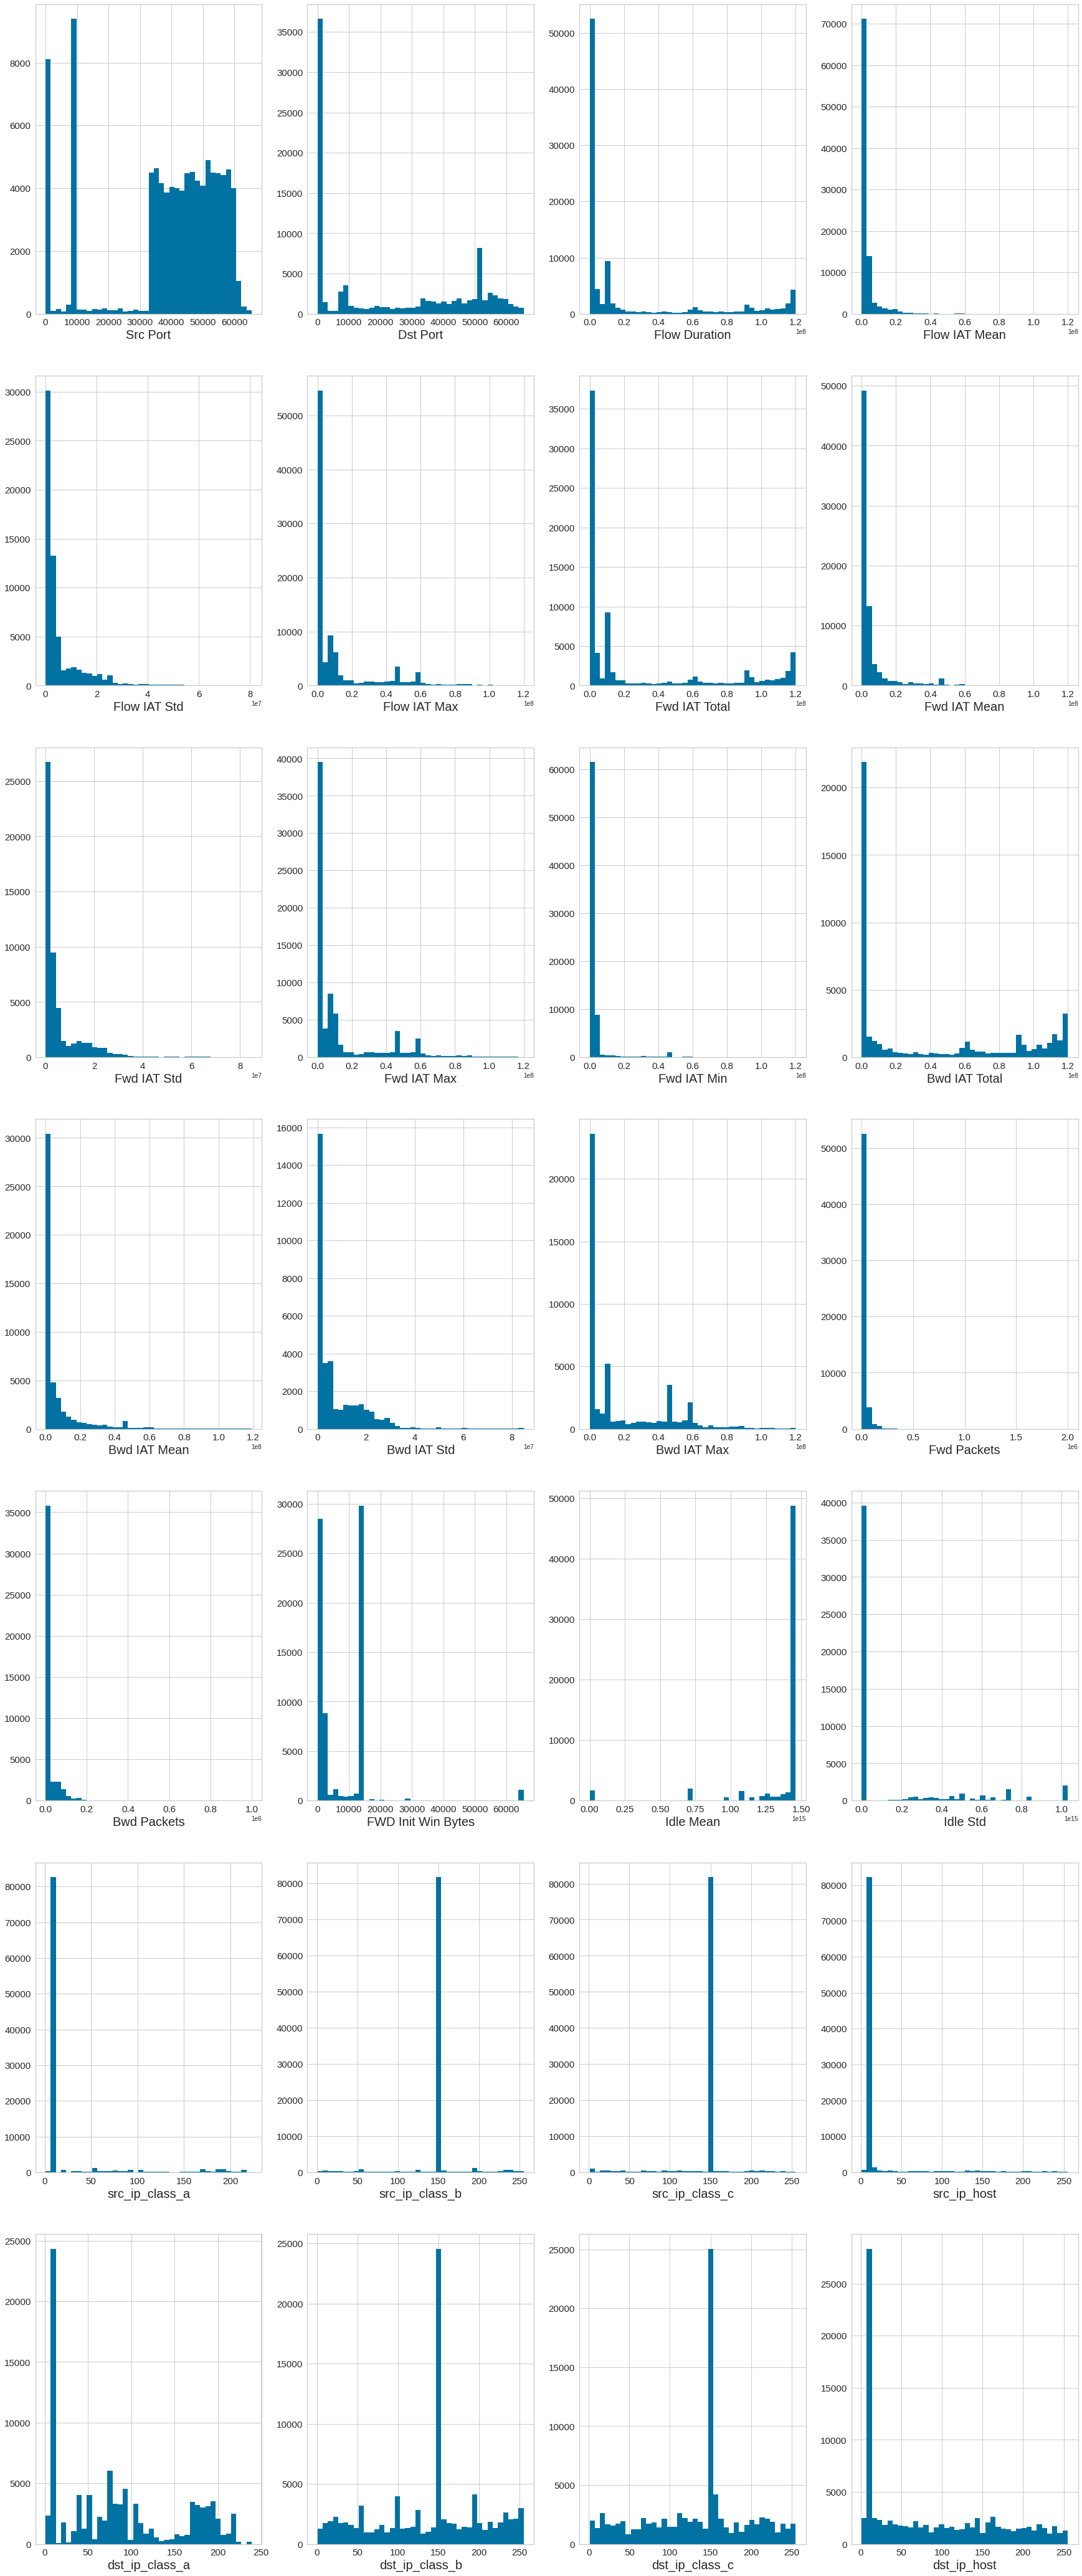

In [ ]:
# Plot histograms for numeric variables

# Import packages
import matplotlib.pyplot as plt

# Set up the figure size
plt.rcParams['figure.figsize'] = (30, 75)

# Make subplots
fig, axes = plt.subplots(nrows = 7, ncols = 4)

# Specify the features of interest              
num_features = ['Src Port', 'Dst Port', 'Flow Duration',
       'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Fwd Packets', 'Bwd Packets', 'FWD Init Win Bytes',
       'Idle Mean', 'Idle Std',
       'src_ip_class_a', 'src_ip_class_b',
       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
       'dst_ip_class_c', 'dst_ip_host']

xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts',
         'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms,
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(num_df[num_features[idx]].dropna(), bins=40, range=(1,num_df[num_features[idx]].max()))
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.show()


## Gerando graficos de barras

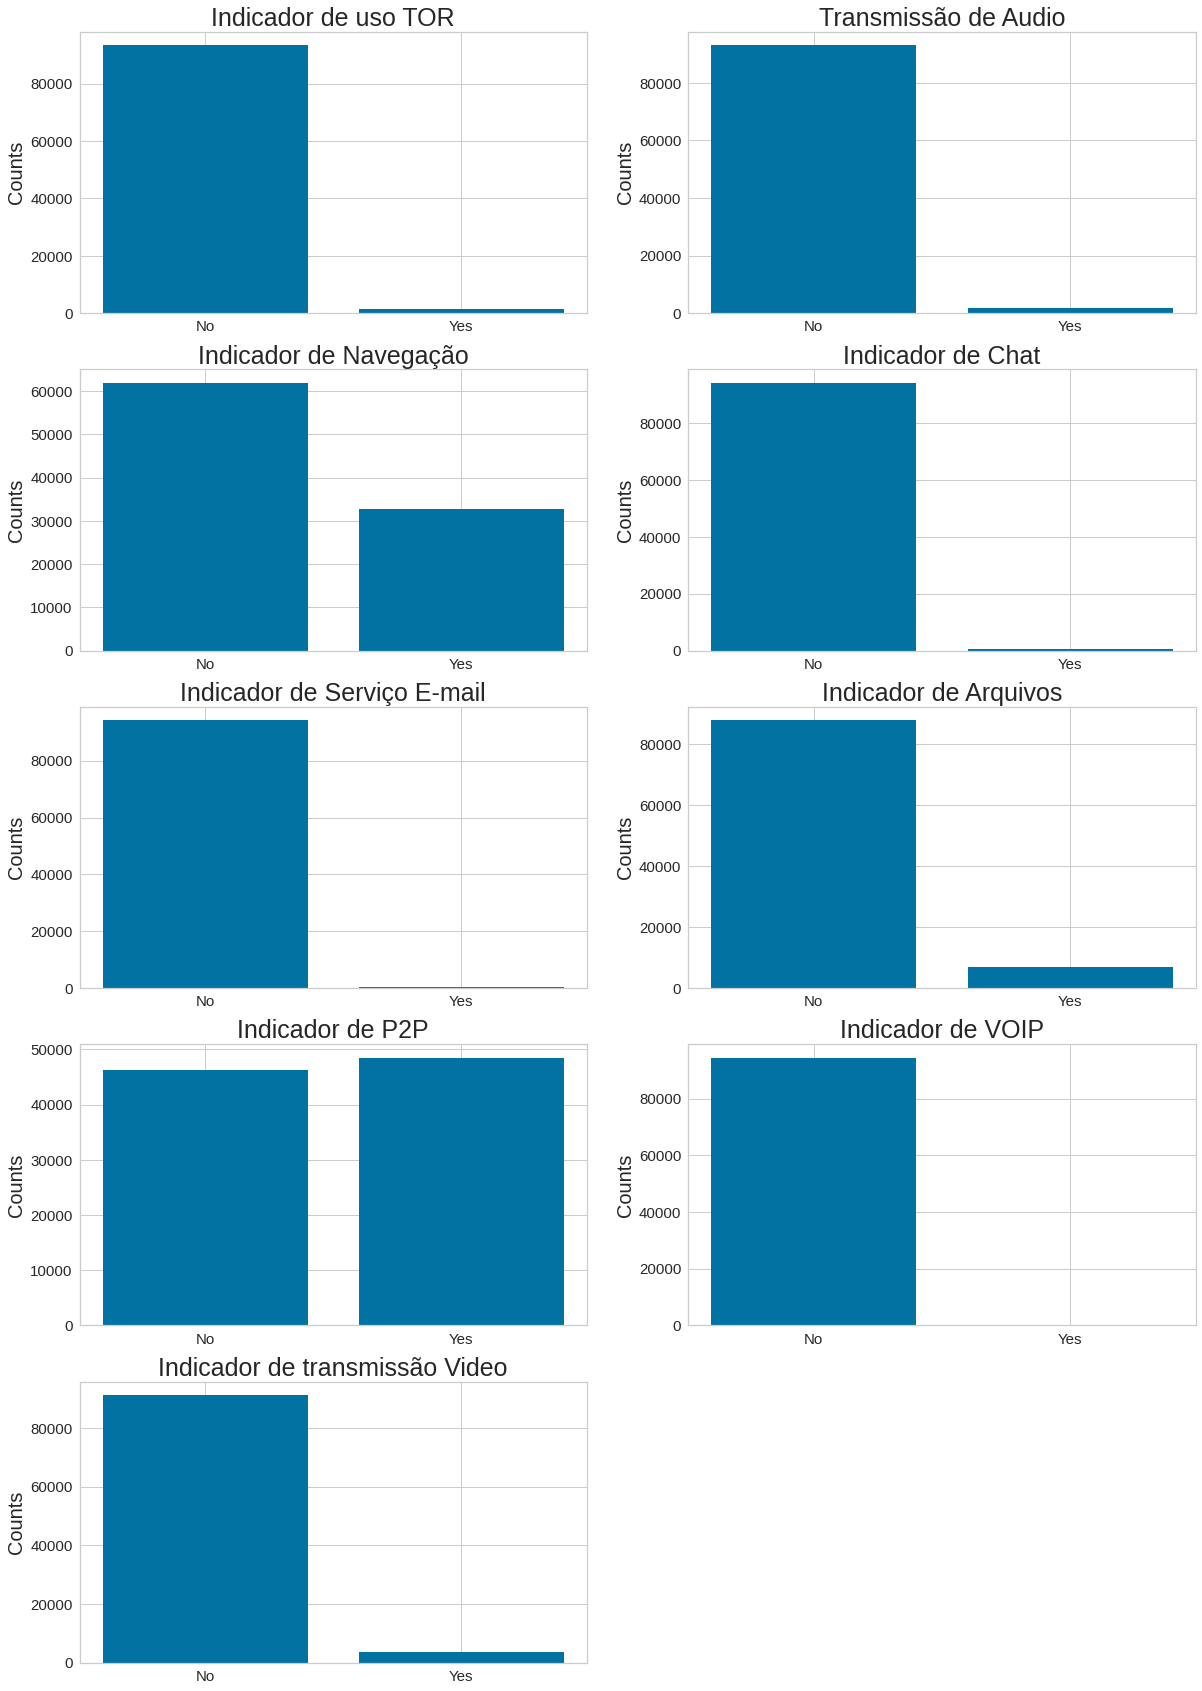

In [ ]:
# Make bar charts for categorical variables.
# tor_indicator
# Audio-Streaming 	Browsing 	Chat 	Email 	File-Transfer 	P2P 	VOIP 	Video-Streaming

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 30)

# Make subplots
fig, axes = plt.subplots(nrows = 5, ncols = 2)

# Plot Tor Indicator
# Replace category name
# Group by category
X_tor_ind = num_df.replace({'tor_indicator': {1: 'Yes', 0: 'No'}}).groupby('tor_indicator').size().reset_index(name='Counts')['tor_indicator']
Y_tor_ind = num_df.replace({'tor_indicator': {1: 'Yes', 0: 'No'}}).groupby('tor_indicator').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 0].bar(X_tor_ind, Y_tor_ind)
axes[0, 0].set_title('Indicador de uso TOR', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Plot Audio Indicator
# Replace category name
# Group by category
X_audio_ind = num_df.replace({'Audio-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Audio-Streaming').size().reset_index(name='Counts')['Audio-Streaming']
Y_audio_ind = num_df.replace({'Audio-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Audio-Streaming').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 1].bar(X_audio_ind, Y_audio_ind)
axes[0, 1].set_title('Transmissão de Audio', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# Plot Browsing Indicator
# Replace category name
# Group by category
X_brows_ind = num_df.replace({'Browsing': {1: 'Yes', 0: 'No'}}).groupby('Browsing').size().reset_index(name='Counts')['Browsing']
Y_brows_ind = num_df.replace({'Browsing': {1: 'Yes', 0: 'No'}}).groupby('Browsing').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 0].bar(X_brows_ind, Y_brows_ind)
axes[1, 0].set_title('Indicador de Navegação', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Plot Chat Indicator
# Replace category name
# Group by category
X_chat_ind = num_df.replace({'Chat': {1: 'Yes', 0: 'No'}}).groupby('Chat').size().reset_index(name='Counts')['Chat']
Y_chat_ind = num_df.replace({'Chat': {1: 'Yes', 0: 'No'}}).groupby('Chat').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 1].bar(X_chat_ind, Y_chat_ind)
axes[1, 1].set_title('Indicador de Chat', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# Plot Email Indicator
# Replace category name
# Group by category
X_email_ind = num_df.replace({'Email': {1: 'Yes', 0: 'No'}}).groupby('Email').size().reset_index(name='Counts')['Email']
Y_email_ind = num_df.replace({'Email': {1: 'Yes', 0: 'No'}}).groupby('Email').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[2, 0].bar(X_email_ind, Y_email_ind)
axes[2, 0].set_title('Indicador de Serviço E-mail', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

# Plot File Indicator
# Replace category name
# Group by category
X_file_ind = num_df.replace({'File-Transfer': {1: 'Yes', 0: 'No'}}).groupby('File-Transfer').size().reset_index(name='Counts')['File-Transfer']
Y_file_ind = num_df.replace({'File-Transfer': {1: 'Yes', 0: 'No'}}).groupby('File-Transfer').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[2, 1].bar(X_file_ind, Y_file_ind)
axes[2, 1].set_title('Indicador de Arquivos', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)

# Plot P2P Indicator
# Replace category name
# Group by category
X_p2p_ind = num_df.replace({'P2P': {1: 'Yes', 0: 'No'}}).groupby('P2P').size().reset_index(name='Counts')['P2P']
Y_p2p_ind = num_df.replace({'P2P': {1: 'Yes', 0: 'No'}}).groupby('P2P').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[3, 0].bar(X_p2p_ind, Y_p2p_ind)
axes[3, 0].set_title('Indicador de P2P', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)

# Plot VOIP Indicator
# Replace category name
# Group by category
X_voip_ind = num_df.replace({'VOIP': {1: 'Yes', 0: 'No'}}).groupby('VOIP').size().reset_index(name='Counts')['VOIP']
Y_voip_ind = num_df.replace({'VOIP': {1: 'Yes', 0: 'No'}}).groupby('VOIP').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[3, 1].bar(X_voip_ind, Y_voip_ind)
axes[3, 1].set_title('Indicador de VOIP', fontsize=25)
axes[3, 1].set_ylabel('Counts', fontsize=20)
axes[3, 1].tick_params(axis='both', labelsize=15)

# Plot Video Indicator
# Replace category name
# Group by category
X_video_ind = num_df.replace({'Video-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Video-Streaming').size().reset_index(name='Counts')['Video-Streaming']
Y_video_ind = num_df.replace({'Video-Streaming': {1: 'Yes', 0: 'No'}}).groupby('Video-Streaming').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[4, 0].bar(X_video_ind, Y_video_ind)
axes[4, 0].set_title('Indicador de transmissão Video', fontsize=25)
axes[4, 0].set_ylabel('Counts', fontsize=20)
axes[4, 0].tick_params(axis='both', labelsize=15)

# Remove unneeded axes since there is an odd number of plots
plt.delaxes(axes[4, 1])

### Analise
A variável de destino está desequilibrada.

## Correlação

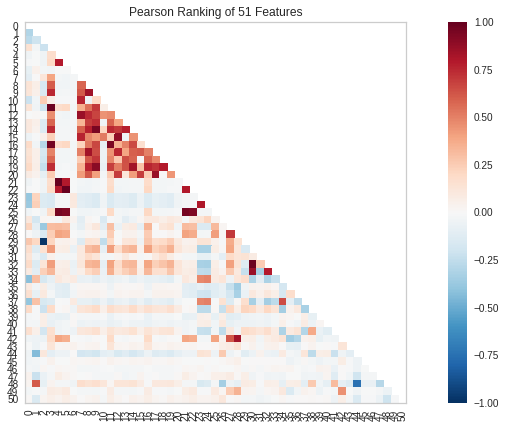

In [ ]:
# To see if the data is correlated, use Pearson Ranking against the numerical features

# Import packages
from yellowbrick.features import Rank2D

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

X = num_df.values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.transform(X)    # Transform the data

# Draw/show/poof the data
visualizer.poof(outpath="corr_matrix_1.png") 
plt.show()

### Análise
Quanto mais escura a cor, maior a correlação. Alguns deles são vermelhos escuros, o que significa que são excessivamente correlacionados e podem ser removidos do conjunto de recursos.

In [ ]:
# Find overly correlated features to remove
# Many of the features are aggreated, which explains why so many are correlated

correlated_features = set()
correlation_matrix = num_df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
# List overly correlated features            
print(correlated_features)

# Drop overly correlated features
model_df = num_df.drop(labels=correlated_features, axis=1)

# Add back on target variable
# Concat encoded columns
model_df = pd.concat([model_df, num_df.tor_indicator], axis=1)

model_df.head(5)

{'Flow IAT Max', 'Fwd Header Length', 'ACK Flag Count', 'Fwd IAT Mean', 'Bwd IAT Max', 'Fwd IAT Max', 'Idle Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'tor_indicator', 'Bwd Packets', 'Bwd IAT Min', 'Idle Max', 'Fwd IAT Min', 'Bwd Header Length', 'Fwd IAT Total', 'Fwd Seg Size Min'}


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Min,...,dst_ip_host,Audio-Streaming,Browsing,Chat,Email,File-Transfer,P2P,VOIP,Video-Streaming,tor_indicator
0,57158,443,6,229,1,1,8733.624454,229.00000,0.00000,229,...,99,1,0,0,0,0,0,0,0,0
1,57159,443,6,407,1,1,4914.004914,407.00000,0.00000,407,...,99,1,0,0,0,0,0,0,0,0
2,57160,443,6,431,1,1,4640.371230,431.00000,0.00000,431,...,99,1,0,0,0,0,0,0,0,0
3,49134,443,6,359,1,1,5571.030641,359.00000,0.00000,359,...,120,1,0,0,0,0,0,0,0,0
4,34697,19305,6,10778451,591,400,91.942711,10887.32424,11412.46641,13,...,127,1,0,0,0,0,0,0,0,0


Limitado a 35 colunas


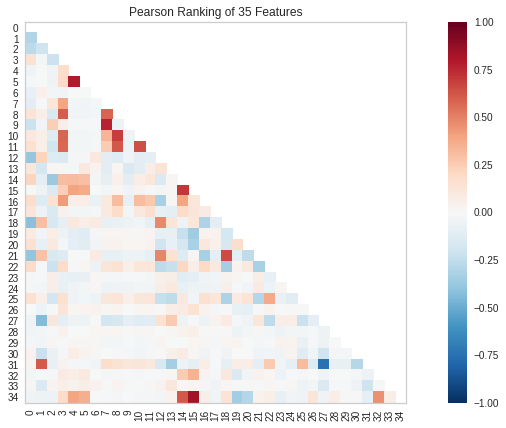

In [ ]:
# Run new correlation matrix

# Import packages
from yellowbrick.features import Rank2D

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

X = model_df.values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.transform(X)    # Transform the data

# Draw/show/poof the data
visualizer.poof(outpath="corr_matrix_2.png") 
plt.show()

## Gráficos de barras empilhadas

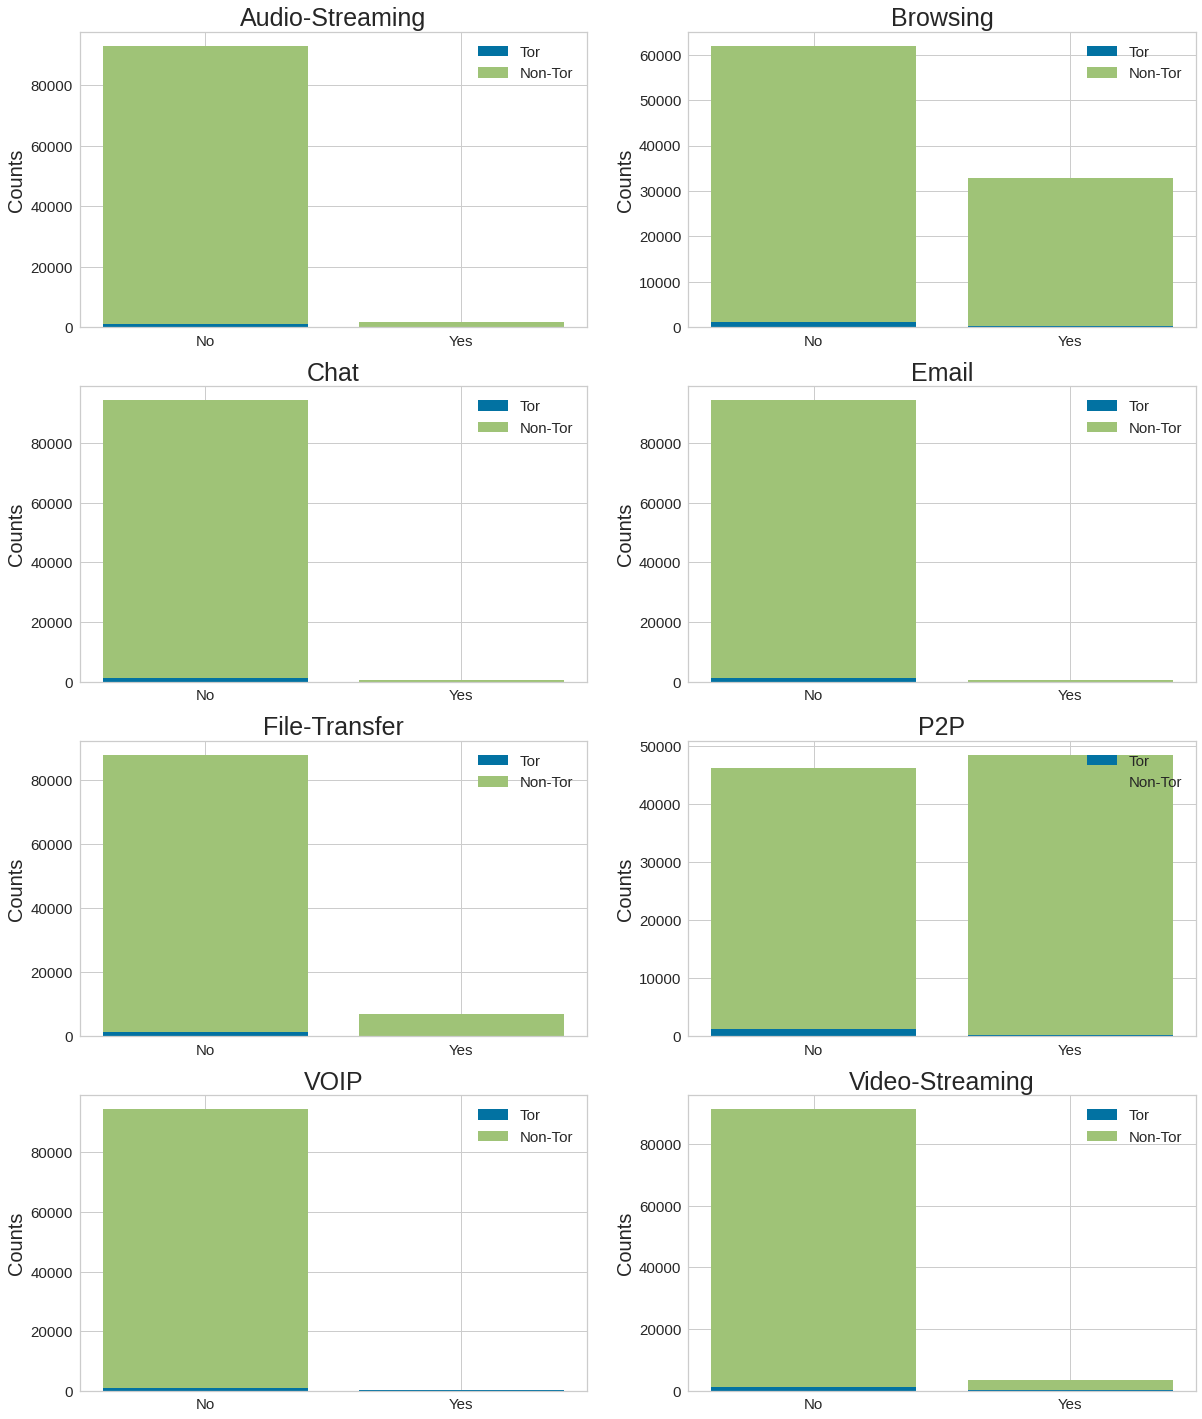

In [ ]:
# Use Stack Bar Charts to compare Tor and Non-Tor traffic
# based on the other categorical variables.

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

# Make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# Plot Audio Indicator
# Group by Tor Indicator
audio_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Audio-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Audio-Streaming'].value_counts()
audio_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Audio-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Audio-Streaming'].value_counts()
audio_nontor = audio_nontor.reindex(index = audio_tor.index)

# Make the bar plot
p1 = axes[0, 0].bar(audio_tor.index, audio_tor.values)
p2 = axes[0, 0].bar(audio_nontor.index, audio_nontor.values, bottom=audio_tor.values)
axes[0, 0].set_title('Audio-Streaming', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Browsing Indicator
# Group by Tor Indicator
brows_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Browsing': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Browsing'].value_counts()
brows_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Browsing': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Browsing'].value_counts()
brows_nontor = brows_nontor.reindex(index = brows_tor.index)

# Make the bar plot
p2 = axes[0, 1].bar(brows_tor.index, brows_tor.values)
p3 = axes[0, 1].bar(brows_nontor.index, brows_nontor.values, bottom=brows_tor.values)
axes[0, 1].set_title('Browsing', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p2[0], p3[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Chat Indicator
# Group by Tor Indicator
chat_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Chat': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Chat'].value_counts()
chat_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Chat': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Chat'].value_counts()
chat_nontor = chat_nontor.reindex(index = chat_tor.index)

# Make the bar plot
p4 = axes[1, 0].bar(chat_tor.index, chat_tor.values)
p5 = axes[1, 0].bar(chat_nontor.index, chat_nontor.values, bottom=chat_tor.values)
axes[1, 0].set_title('Chat', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p4[0], p5[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Email Indicator
# Group by Tor Indicator
email_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Email': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Email'].value_counts()
email_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Email': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Email'].value_counts()
email_nontor = email_nontor.reindex(index = email_tor.index)

# Make the bar plot
p6 = axes[1, 1].bar(email_tor.index, email_tor.values)
p7 = axes[1, 1].bar(email_nontor.index, email_nontor.values, bottom=email_tor.values)
axes[1, 1].set_title('Email', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p6[0], p7[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot File Indicator
# Group by Tor Indicator
file_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'File-Transfer': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['File-Transfer'].value_counts()
file_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'File-Transfer': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['File-Transfer'].value_counts()
file_nontor = file_nontor.reindex(index = file_tor.index)

# Make the bar plot
p8 = axes[2, 0].bar(file_tor.index, file_tor.values)
p9 = axes[2, 0].bar(file_nontor.index, file_nontor.values, bottom=file_tor.values)
axes[2, 0].set_title('File-Transfer', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p8[0], p9[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot P2P Indicator
# Group by Tor Indicator
p2p_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'P2P': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['P2P'].value_counts()
p2p_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'P2P': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['P2P'].value_counts()
p2p_nontor = p2p_nontor.reindex(index = p2p_tor.index)

# Make the bar plot
p10 = axes[2, 1].bar(p2p_tor.index, p2p_tor.values)
p11 = axes[2, 1].bar(p2p_nontor.index, p2p_nontor.values, bottom=p2p_tor.values)
axes[2, 1].set_title('P2P', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)
axes[2, 1].legend((p10[0], p11[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot VOIP Indicator
# Group by Tor Indicator
voip_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'VOIP': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['VOIP'].value_counts()
voip_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'VOIP': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['VOIP'].value_counts()
voip_nontor = voip_nontor.reindex(index = voip_tor.index)

# Make the bar plot
p12 = axes[3, 0].bar(voip_tor.index, voip_tor.values)
p13 = axes[3, 0].bar(voip_nontor.index, voip_nontor.values, bottom=voip_tor.values)
axes[3, 0].set_title('VOIP', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)
axes[3, 0].legend((p12[0], p13[0]), ('Tor', 'Non-Tor'), fontsize = 15)

# Plot Video Indicator
# Group by Tor Indicator
video_tor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Video-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==1]['Video-Streaming'].value_counts()
video_nontor = model_df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}}).replace({'Video-Streaming': {0: 'No', 1: 'Yes'}})[model_df['tor_indicator']==0]['Video-Streaming'].value_counts()
video_nontor = video_nontor.reindex(index = video_tor.index)

# Make the bar plot
p14 = axes[3, 1].bar(video_tor.index, video_tor.values)
p15 = axes[3, 1].bar(video_nontor.index, video_nontor.values, bottom=video_tor.values)
axes[3, 1].set_title('Video-Streaming', fontsize=25)
axes[3, 1].set_ylabel('Counts', fontsize=20)
axes[3, 1].tick_params(axis='both', labelsize=15)
axes[3, 1].legend((p14[0], p15[0]), ('Tor', 'Non-Tor'), fontsize = 15)


### Análise
Esta é uma visualização rápida para determinar quais categorias de tráfego tinham taxas de tráfego Tor. Parece que todo o tráfego VOIP foi designado como Tor. Pouco ou nenhum dos fluxos de áudio, bate-papo, e-mail e transferências de arquivos foram designados como Tor.

In [ ]:
# Export dataset for external visualizations
model_df.to_csv(r'Data\cleaned_data.csv', index = False, header=True)

# Leitura da Base de dados limpa anteriormente
Com dados limpos oriundos da revisão anterior sobre o dataset da DarkNet 2020 dataset from the Canadian Institute for Cybersecurity at the University of New Brunswick

## Importando pacotes

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




# Preparação dos Dados

## Dados para analise

In [ ]:
# Load data into dataframe
data_file = "Data_cleaned_data.csv"
df = pd.read_csv(data_file)

## Padronização


In [ ]:
# Although standardization is not needed for Logistic Regression, 
# it is recommended when using weights to counter imbalanced classes

# Original df
#print(df.head())

# Separate features from target
features = df.drop(['tor_indicator'], axis=1)

# Convert df to numpy array
x = features.values

# Create function to standardize feature data
# Accepts array object and returns scaled array
def scale_data(x):
    
    # Create scaler
    scaler = preprocessing.StandardScaler()

    # Transform the feature
    x_scaled = scaler.fit_transform(x)
    
    # Convert back to Pandas dataframe
    std_df = pd.DataFrame(x_scaled, columns = 
                      ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
                       'Total Bwd packets', 'Flow Packets', 'Flow IAT Mean', 'Flow IAT Std',
                       'Flow IAT Min', 'Fwd IAT Std', 'Bwd IAT Std', 'Fwd Packets',
                       'Down/Up Ratio', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
                       'Idle Mean', 'Idle Std', 'src_ip_class_a', 'src_ip_class_b',
                       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
                       'dst_ip_class_c', 'dst_ip_host', 'Audio-Streaming', 'Browsing', 'Chat',
                       'Email', 'File-Transfer', 'P2P', 'VOIP', 'Video-Streaming'])

    # Print Standardized df
    #print(std_df.head())

    return std_df

# Scale data before training
# Pass features as numpy array
std_df = scale_data(x)

## Divisão do Dataset

In [ ]:
# Split data into two sets: Training and Validation.

# Create features dataset
data_model_X = std_df

# Create target dataset
# Replace category name
data_model_y = df.replace({'tor_indicator': {1: 'Tor', 0: 'Non-Tor'}})['tor_indicator']

# Split the data into training and validation datasets
# Save 30% for validation
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# Check details of the datasets
print("Number of samples in original set: ", data_model_X.shape[0])
print("Number of samples in training set: ", X_train.shape[0])
print("Number of samples in validation set: ", X_val.shape[0])

# Check distribution of each set
# Tor and Non-Tor
print('\n')
print('Number of Tor and Non-Tor in the original set:')
print(data_model_y.value_counts())

print('\n')
print('Number of Tor and Non-Tor in the training set:')
print(y_train.value_counts())

print('\n')
print('Number of Tor and Non-Tor in the validation set:')
print(y_val.value_counts())


Number of samples in original set:  94748
Number of samples in training set:  66323
Number of samples in validation set:  28425


Number of Tor and Non-Tor in the original set:
Non-Tor    93356
Tor         1392
Name: tor_indicator, dtype: int64


Number of Tor and Non-Tor in the training set:
Non-Tor    65346
Tor          977
Name: tor_indicator, dtype: int64


Number of Tor and Non-Tor in the validation set:
Non-Tor    28010
Tor          415
Name: tor_indicator, dtype: int64


# Modelo de evolução e seleção


## Importando Bibliotecas

In [ ]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import matthews_corrcoef

## Construção do Modelo

In [ ]:
# Run a Logistic Regression Model to predict if traffic is Tor or not

# Instantiate the classification model 
# class_weight parameter set to balanced
# "The balanced mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data."
logistic_regression = LogisticRegression(class_weight = 'balanced', random_state=0, solver='sag')

# Fit model to training data
model = logistic_regression.fit(X_train, y_train)

### Primeiras analises

Modelos construídos com vários solucionadores para selecionar o melhor solucionador para este caso de uso (sag).

## Evolução do Modelo

### Matrix confusão

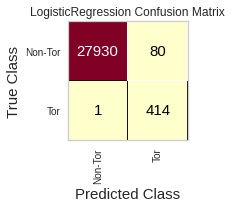

In [ ]:
# Use Confusion Matrix to evaluate the model 

# The ConfusionMatrix visualizer is a ScoreVisualizer that takes a scikit-learn classifier 
# and a set of test X and y values and returns a report showing how each of the test values predicted 
# classes compare to their actual classes.

# Set up the figure size
plt.rcParams['figure.figsize'] = (3, 3)

classes = ['Non-Tor','Tor']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the passed model
cm.fit(X_train, y_train)
  
# Score runs predict() and creates the confusion_matrix
cm.score(X_val, y_val)
       
# Change font for labels
for label in cm.ax.texts:
    label.set_size(15)

# Set label fonts
plt.xlabel('False Class',fontsize=15)
plt.ylabel('Predicted Class',fontsize=15)
    
# Draw plot
cm.poof()

#### Analise

Precisão = (Verdadeiros Positivos + Verdadeiros Negativos)/Todos

Observe que a precisão não é a melhor medida, pois a classe-alvo é desequilibrada. Usando esta matriz de confusão, a precisão é calculada em 99,7%.

Resultados falsos negativos da comparação do solver. Evite over-fitting usando sag ou saga.
- lbfgs 0 falsos negativos
- liblinear 0 falsos negativos
- newton-cg 0 falsos negativos
- sag 1 falso negativo
- saga 1 falso negativo

### Relatório de classificação

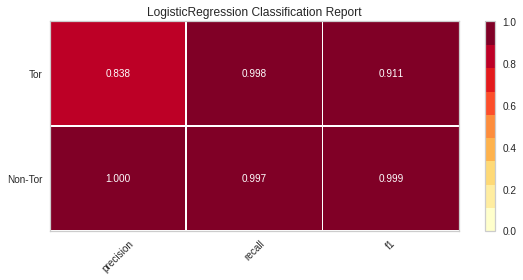

In [ ]:
# Use Precision, Recall & F1 score to evaluate the model
# Create a Report of Evaluation Metrics

# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 10

# Instantiate the ClassificationReport visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data

g = visualizer.poof()

#### Análise
Quanto mais escuro, melhor. As previsões para tráfego Tor e não Tor foram boas para todas as métricas, embora a precisão tenha mostrado um resultado um pouco menor para registros identificados como Tor.

In [ ]:
# Use Matthews Correlation Coefficient (MCC) for a better metric for imbalanced classes
from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_val)
y_true = y_val

matthews_corrcoef(y_true, y_pred)

0.9130213905960409

### Analysis

MCC results of solver comparison.  Best MCC is with newton-cg at 95%.  However, to avoid overfitting, will select sag with an MCC of 91%.
- lbfgs MCC = 91%
- liblinear MCC = 94%, 0 false negatives
- newton-cg MCC = 95%, 0 false negatives
- sag MCC = 91%, 1 false negative 
- saga MCC = 89%, 1 false negative

## Feature Importance

Feature: 0, Score: -1.84164
Feature: 1, Score: -5.24866
Feature: 2, Score: -0.12263
Feature: 3, Score: -0.29018
Feature: 4, Score: 0.07921
Feature: 5, Score: 0.01291
Feature: 6, Score: -0.61378
Feature: 7, Score: 0.95612
Feature: 8, Score: 0.23436
Feature: 9, Score: -0.41321
Feature: 10, Score: -0.42104
Feature: 11, Score: 0.04598
Feature: 12, Score: -0.29020
Feature: 13, Score: 0.04685
Feature: 14, Score: 1.57611
Feature: 15, Score: 1.14001
Feature: 16, Score: -0.43699
Feature: 17, Score: -0.24864
Feature: 18, Score: 1.30899
Feature: 19, Score: -0.40497
Feature: 20, Score: -0.18587
Feature: 21, Score: 1.33597
Feature: 22, Score: 0.55273
Feature: 23, Score: -0.46293
Feature: 24, Score: -0.31138
Feature: 25, Score: 0.31603
Feature: 26, Score: 0.25086
Feature: 27, Score: 0.15933
Feature: 28, Score: 0.28810
Feature: 29, Score: 0.00652
Feature: 30, Score: -0.26304
Feature: 31, Score: -0.60783
Feature: 32, Score: 2.23350
Feature: 33, Score: 0.61225


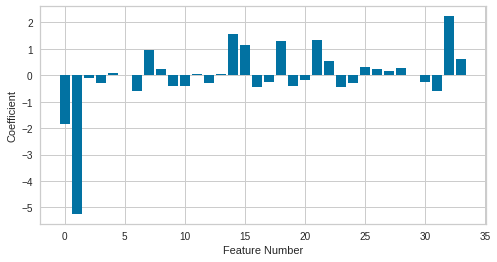

In [ ]:
# Use scaled data and review the model coefficients to approximate feature importance

# Get model coefficients
importance = model.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)

# Set label fonts
plt.xlabel('Feature Number')
plt.ylabel('Coefficient')

plt.show()

### Analise
Características com pontuações positivas predizem a classe 1 (Tor), enquanto as características com pontuações negativas predizem a classe 0 (Não-Tor).

O recurso de maior impacto no modelo é o Feature 1, a porta de destino, seguido pelo Feature 32, o indicador VOIP.

# Conclusão

Depois de revisar várias métricas, acredito que o Coeficiente de Correlação de Matthews é a melhor métrica para este caso. A precisão não é recomendada para regressão logística. A classe desequilibrada de 2% de tráfego Tor versus 98% de tráfego não Tor pode elevar outras métricas, como F1, precisão e recall.

Com pesos adicionais para combater o desequilíbrio no modelo e as altas pontuações em todas as métricas, incluindo 91% de MCC, acredito que este é um bom modelo e pode ser implantado

# Test Model


In [ ]:
# Load features set into array X with the following values
# ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
#       'Total Bwd packets', 'Flow Packets', 'Flow IAT Mean', 'Flow IAT Std',
#       'Flow IAT Min', 'Fwd IAT Std', 'Bwd IAT Std', 'Fwd Packets',
#       'Down/Up Ratio', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
#       'Idle Mean', 'Idle Std', 'src_ip_class_a', 'src_ip_class_b',
#       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
#       'dst_ip_class_c', 'dst_ip_host', 'Audio-Streaming', 'Browsing', 'Chat',
#       'Email', 'File-Transfer', 'P2P', 'VOIP', 'Video-Streaming']

X1 = [[443, 443, 
      6, 200, 1, 3, 23, 400, 70, 140, 57, 40, 2.2, 0, 
      5000, 5000, 0, 0,
      10, 152, 0, 10, 143, 110, 50, 0, 
      0,0,0,0,1,0,0,0],
      
      [57158, 443, 
      6, 229, 1, 1, 8733.624454, 229, 0, 229, 0, 0, 4366.812227, 1, 
      1892, 1047, 0, 0,
      10, 152, 152, 11, 216, 58, 220, 99, 
      1,0,0,0,0,0,0,0]]  # Non-Tor Record from training data

X2 = [[443, 50443, 
      6, 200, 1, 3, 23, 400, 70, 140, 57, 40, 2.2, 0, 
      5000, 5000, 0, 0,
      10, 152, 0, 10, 143, 110, 50, 0, 
      0,0,0,0,1,0,0,0],
      
      [35118, 443, 
      6, 90137503, 3, 3, .066565, 18027501, 24650198, 25480, 8.485281, 201.5254, .033282, 1, 
      380, 433, 1430000000000000, 36756746.12,
      131, 202, 240, 150, 216, 58, 219, 237, 
      0,0,0,0,0,0,0,1]]  # Tor Record from training data

# Scale data before training
# Pass features as numpy array
#std_X1 = scale_data(X1)
#print(std_X1)
#std_X2 = scale_data(X2)

# Make predictions
#result = model.predict(std_X1)
result = model.predict(X1)
print(result)

#result = model.predict(std_X2)
result = model.predict(X2)
print(result)

['Tor' 'Non-Tor']
['Non-Tor' 'Non-Tor']


# Deployment

In [ ]:
# Save Model
import joblib
joblib.dump(model, 'zero_trust.model')

['zero_trust.model']

In [ ]:
# Deployment Instructions
# Created with Python 3.7.6
# Library versions: Yellowbrick 1.2; Scikit-Learn 23.2

# Load the model from disk
loaded_model = joblib.load('zero_trust.model')

# Load features set into array X with the following values
# ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
#       'Total Bwd packets', 'Flow Packets', 'Flow IAT Mean', 'Flow IAT Std',
#       'Flow IAT Min', 'Fwd IAT Std', 'Bwd IAT Std', 'Fwd Packets',
#       'Down/Up Ratio', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
#       'Idle Mean', 'Idle Std', 'src_ip_class_a', 'src_ip_class_b',
#       'src_ip_class_c', 'src_ip_host', 'dst_ip_class_a', 'dst_ip_class_b',
#       'dst_ip_class_c', 'dst_ip_host', 'Audio-Streaming', 'Browsing', 'Chat',
#       'Email', 'File-Transfer', 'P2P', 'VOIP', 'Video-Streaming']

X = [[443, 10, 
      6, 200, 1, 3, 23, 400, 70, 140, 57, 40, 2.2, 0, 
      9000, 5000, 0, 0,
      10, 152, 0, 10, 143, 110, 50, 0, 
      0,0,0,0,1,1,0,1]]

# Make predictions
result = loaded_model.predict(X)
print(result)

['Tor']


# Referencias

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7

https://machinelearningmastery.com/calculate-feature-importance-with-python/\

https://github.com/amodavis/Zero_Trust

https://csrc.nist.gov/publications/detail/sp/800-207/final